<a href="https://colab.research.google.com/github/terollierisa/Digit-Recognition-with-Neural-Networks/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
try:
    import gdown
except ImportError:
    !pip install gdown

def download_dataset_from_google_drive(google_file_id: str, output_file_name: str, quiet_download: bool) -> str:
    file_path = f'./{output_file_name}'

    if not os.path.exists(file_path):
        gdown.download(id=google_file_id, output=output_file_name, quiet=quiet_download)
    else:
        print(f"{output_file_name} already exists!")

    return file_path

In [2]:
# https://drive.google.com/file/d/1FOse3OfTdrBjo0m_PaQYdGYhgWi1s5Jy/view?usp=drive_link
# validation: https://drive.google.com/file/d/1FOse3OfTdrBjo0m_PaQYdGYhgWi1s5Jy/view?usp=sharing
x = download_dataset_from_google_drive("1FOse3OfTdrBjo0m_PaQYdGYhgWi1s5Jy", "validation.zip", False)

Downloading...
From: https://drive.google.com/uc?id=1FOse3OfTdrBjo0m_PaQYdGYhgWi1s5Jy
To: /content/validation.zip
100%|██████████| 23.3M/23.3M [00:00<00:00, 28.0MB/s]


In [3]:
os.path.exists(x)

True

In [4]:
import zipfile

In [5]:
with zipfile.ZipFile(x, 'r') as zip_ref:
  zip_ref.extractall('./')

In [6]:
# https://drive.google.com/file/d/1qoro8ipZan2-2x0hK7vt68_l65CaiD3s/view?usp=drive_link
x = download_dataset_from_google_drive("1qoro8ipZan2-2x0hK7vt68_l65CaiD3s", "train.zip", False)

Downloading...
From (original): https://drive.google.com/uc?id=1qoro8ipZan2-2x0hK7vt68_l65CaiD3s
From (redirected): https://drive.google.com/uc?id=1qoro8ipZan2-2x0hK7vt68_l65CaiD3s&confirm=t&uuid=0f590a65-6eb9-4edd-8054-5979d56bb993
To: /content/train.zip
100%|██████████| 46.3M/46.3M [00:00<00:00, 47.3MB/s]


In [7]:
with zipfile.ZipFile(x, 'r') as zip_ref:
  zip_ref.extractall('./')

In [8]:
from  keras.preprocessing import image_dataset_from_directory

In [9]:
train_generator = image_dataset_from_directory(
    "./train/",
    batch_size=20,
    image_size=(150, 150),
    label_mode = "binary",
    class_names = ["cats", "dogs"]
)
validation_generator = image_dataset_from_directory(
    "./validation/",
    batch_size=20,
    image_size=(150, 150),
    label_mode = "binary",
    class_names = ["cats", "dogs"]
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
  print("Data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

Data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20, 1)


In [11]:
from keras import layers
from keras import models

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras import optimizers
model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(learning_rate = 0.0001),
              metrics = ['acc'])

In [15]:
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - acc: 0.5126 - loss: 6.7612 - val_acc: 0.5630 - val_loss: 0.6961
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.6142 - loss: 0.6922 - val_acc: 0.5830 - val_loss: 0.6948
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.7077 - loss: 0.5507 - val_acc: 0.6130 - val_loss: 0.7581
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.7717 - loss: 0.4561 - val_acc: 0.6430 - val_loss: 0.7504
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - acc: 0.8174 - loss: 0.3839 - val_acc: 0.6190 - val_loss: 0.8330
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.8906 - loss: 0.2745 - val_acc: 0.6410 - val_loss: 0.9647
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9072 - loss: 0.2099 - val_acc: 0.6830 - val_loss: 0.8957
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9232 - loss: 0.1866 - val_acc: 0.6530 - val_loss: 1.0553
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/

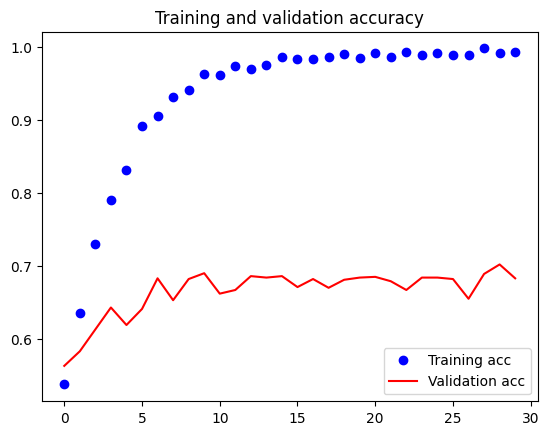

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(30)
train_acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

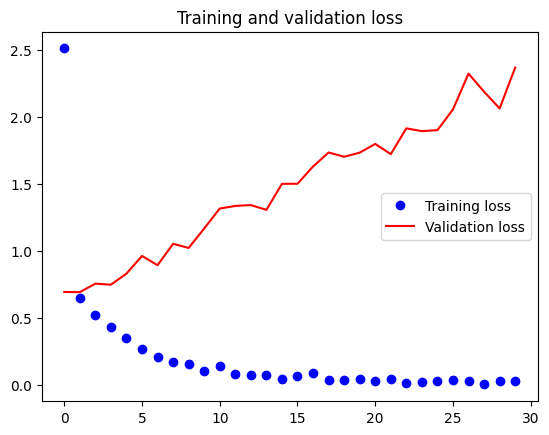

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(30)
train_acc = history.history['loss']
val_acc = history.history['val_loss']
plt.plot(epochs, train_acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()